<a href="https://colab.research.google.com/github/kkh9372/Colab/blob/main/Ch3.%EB%94%A5%EB%9F%AC%EB%8B%9D/6_%EB%94%A5%EB%9F%AC%EB%8B%9D_CNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2021/10/27
이름 : 김관후
날짜 : 딥러닝 CNN 실습하기
"""
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image

In [ ]:
# 데이터 불러오기
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()
cifar_train_data.shape 

(50000, 32, 32, 3)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


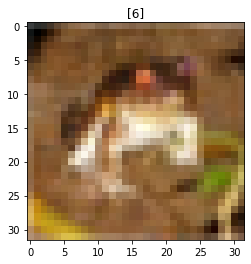

In [ ]:
# 데이터 이미지 확인
plt.title(cifar_train_label[0])
plt.imshow(cifar_train_data[0])
plt.show()

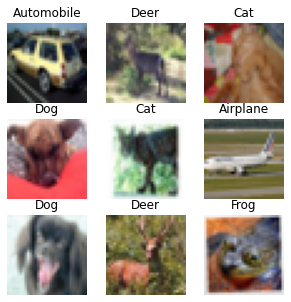

In [ ]:
# 데이터 샘플 확인
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship']
random_idx = np.random.randint(50000, size=9)

plt.figure(figsize=(5,5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title(label_names[label])
  plt.axis('off')

In [ ]:
# 학습데이터, 라벨(원-핫 인코딩)
cifar_train_data = cifar_train_data / 255
cifar_test_data = cifar_test_data / 255

cifar_train_label= to_categorical(cifar_train_label)
cifar_test_label = to_categorical(cifar_test_label)


In [ ]:
#학습모델
model = Sequential()

#CNN층
model.add(Conv2D(32,(3,3),padding='same',activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))

#FCNN층(일반 딥러닝 입력층,은닉층, 출력층)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [ ]:
# 모델 설정
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# 학습하기
model.fit(cifar_train_data, cifar_train_label, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 23s 10ms/step - loss: 1.3053 - acc: 0.5334
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9349 - acc: 0.6715
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7517 - acc: 0.7369
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6023 - acc: 0.7895
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4637 - acc: 0.8359
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3467 - acc: 0.8777
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2538 - acc: 0.9105
Epoch 8/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1998 - acc: 0.9285
Epoch 9/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1622 - acc: 0.9433
Epoch 10/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.1393 - acc: 0.9520
Epoch 11/

In [ ]:
# 평가하기
model.evaluate(cifar_test_data, cifar_test_label)

313/313 [==============================] - 2s 5ms/step - loss: 2.1058 - acc: 0.6926


[2.1057913303375244, 0.6926000118255615]

In [ ]:
# 모델저장
model.save('/content/drive/MyDrive/Colab Notebooks/model/cifar10.h5')